In [1]:
import nltk
from nltk import word_tokenize, RegexpParser

**Part 0: Tokenization et al.**

In [2]:
text = word_tokenize("University of New South Wales is located in Sydney, Australia")
result = nltk.pos_tag(text)
result

[('University', 'NNP'),
 ('of', 'IN'),
 ('New', 'NNP'),
 ('South', 'NNP'),
 ('Wales', 'NNP'),
 ('is', 'VBZ'),
 ('located', 'VBN'),
 ('in', 'IN'),
 ('Sydney', 'NNP'),
 (',', ','),
 ('Australia', 'NNP')]

In [3]:
gram = ("NNPS: {<DT>?<NNP>*}")

In [4]:
chunking = nltk.RegexpParser(gram)

In [5]:
tree = chunking.parse(result)
print(tree)

(S
  (NNPS University/NNP)
  of/IN
  (NNPS New/NNP South/NNP Wales/NNP)
  is/VBZ
  located/VBN
  in/IN
  (NNPS Sydney/NNP)
  ,/,
  (NNPS Australia/NNP))


**Part 1: Stemming versus Lemmatisation**

In [6]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [7]:
sentence = "Too many patients are catching COVID in Australian hospitals, doctors say."

In [8]:
text = word_tokenize(sentence)

In [9]:
stemmed_words = [stemmer.stem(word) for word in text]
stemmed_words

['too',
 'mani',
 'patient',
 'are',
 'catch',
 'covid',
 'in',
 'australian',
 'hospit',
 ',',
 'doctor',
 'say',
 '.']

In [10]:
from nltk.corpus import wordnet

In [11]:
synsets = wordnet.synsets('sydney')
for i, synset in enumerate(synsets):
	print(i, synset.definition(), "[", synset.pos(), "]")

0 the largest Australian city located in southeastern Australia on the Tasman Sea; state capital of New South Wales; Australia's chief port [ n ]


In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


In [13]:
tk_content=word_tokenize(sentence)
lemmatized_words = [lemmatizer.lemmatize(i) for i in tk_content] 
print(lemmatized_words)

['Too', 'many', 'patient', 'are', 'catching', 'COVID', 'in', 'Australian', 'hospital', ',', 'doctor', 'say', '.']


**Part 2: Simple text analysis**

In [14]:
from nltk.tokenize import wordpunct_tokenize

In [15]:
test_tokens = wordpunct_tokenize("Too many patients are catching COVID in Australian hospitals, doctors say.")
test_tokens

['Too',
 'many',
 'patients',
 'are',
 'catching',
 'COVID',
 'in',
 'Australian',
 'hospitals',
 ',',
 'doctors',
 'say',
 '.']

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/z3539958/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
content_words = [i for i in test_tokens if i not in stopwords]
content_words

['Too',
 'many',
 'patients',
 'catching',
 'COVID',
 'Australian',
 'hospitals',
 ',',
 'doctors',
 'say',
 '.']

In [18]:
from nltk.corpus import gutenberg
from nltk.text import Text
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/z3539958/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [19]:
book = Text(gutenberg.words("melville-moby_dick.txt"))
book_tokens = [i.lower() for i in book.tokens]


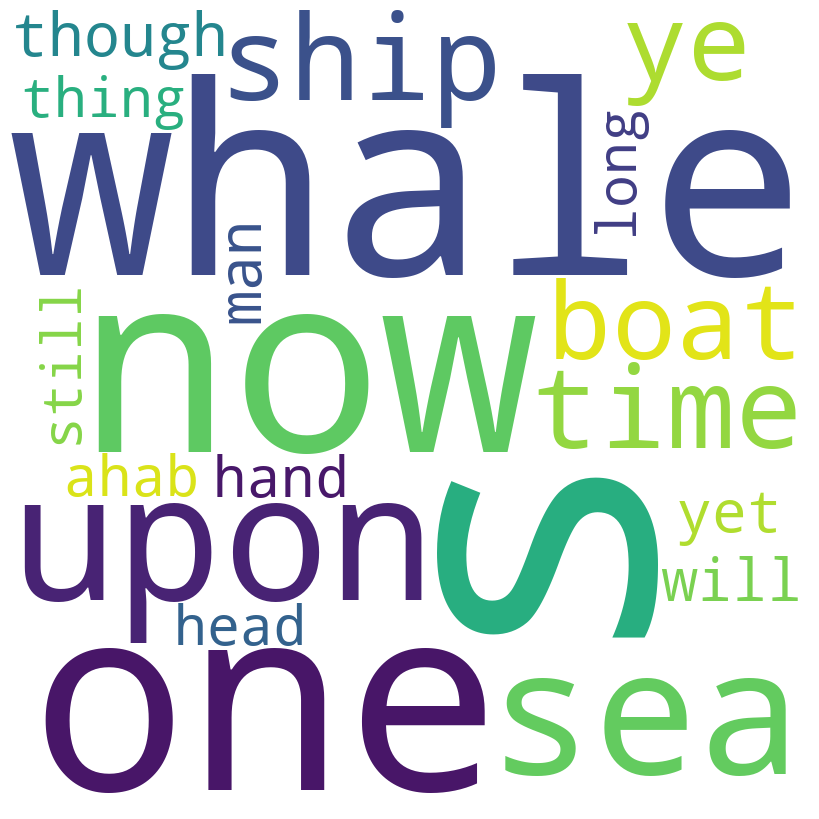

In [22]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                max_words = 20, stopwords = stopwords,
                min_font_size = 10).generate(' '.join(book_tokens))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


In [21]:
from nltk.corpus import sentiwordnet as swn
a = swn.senti_synset('sad.a.01')
print(a)
print("All synsets of `sad' ")
senti_synsets = swn.senti_synsets('sad')
for i in senti_synsets:
    print(i)

<sad.a.01: PosScore=0.125 NegScore=0.75>
All synsets of `sad' 
<sad.a.01: PosScore=0.125 NegScore=0.75>
<sad.s.02: PosScore=0.0 NegScore=0.25>
<deplorable.s.01: PosScore=0.0 NegScore=1.0>


In [32]:
gram = ("NNPS: {<NNP><NN>}")
text = word_tokenize("The old man the boat")
result = nltk.pos_tag(text)
print(result)
chunking = nltk.RegexpParser(gram)
tree = chunking.parse(result)
print(tree)
result


[('The', 'DT'), ('old', 'JJ'), ('man', 'NN'), ('the', 'DT'), ('boat', 'NN')]
(S The/DT old/JJ man/NN the/DT boat/NN)


[('The', 'DT'), ('old', 'JJ'), ('man', 'NN'), ('the', 'DT'), ('boat', 'NN')]